## Tips and Tricks for Jupyter Notesbooks

1. Learn and use the keyboard shortcuts!

Examples:

        Select all text in a cell (Cmd a on a mac)
        Add new cell (move cursor below current cell and click +Code or +Markdown,
                       or click to left of cell, then A to add above or B to add below)
        Double click in a markdown cell to modify it
        Indentation and Outdentation (tab and shift-tab)
        Comment In/Out (command /)
        Drag a cell to move it
        Run cell  (shift return)
        Show Line numbers in cells (L) -- Useful for interpreting error messages!rn)

        etc.
        

Here is a notebook which will allow you to practice shortcuts:

https://github.com/maxmelnick/jupyter_keyboard_shortcuts_snippets/blob/master/Jupyter%20Keyboard%20Shortcuts%20Practice.ipynb


Here is a more extensive presentation of useful keyboard shortcuts

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/#:~:text=D%20%2B%20D%20

2. Warning:  If you delete code in a cell, you can retrieve it using Undo (Ctr-z); if you delete or move a cell in Codespaces, you can Undo the action as well. However, on MY local machine, this does not work.  So think carefully before you delete a cell. If you are not sure whether you want a cell, comment out the whole cell instead of deleting. You can clean up the code before you submit. 

test

3. Python (unfortunately) allows you to *redefine* system variable and function names. Do NOT use the following for variables, as they are already defined as functions!

        sum
        list 
        mean
        dict
        max
        min
        len
        str
        

When in doubt, type in the name in a cell and execute that cell to see if it has a binding. 

If you make this mistake, you can remove the binding using the function `del` or Kill and Restart Kernel. 

In [1]:
sum = 4

4.  When code is taking too long to finish:  `Interrupt` (only appears when code is running)

            
When things go really sideways (like you just redefined `sum` or totally weird errors are happening): `Restart`

        

<b>ALWAYS `Restart` and `Run All` to check that your code works before submitting!</b>

5. Jupyter keeps a global list of variable bindings. 

In [2]:
globals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'sum', '_i2'])

There are various HORRIBLE, CONFUSING bugs that can result from this:


**Solutions:**

    Don't reuse global variables between cells.
    
    Don't get in the habit of using simple variables x, y, tmp etc. in multiple cells. Use x1, x2, x3, ...
    
    In our assignments, we use q1, q2, q3, etc.   Don't reuse these in other cells!

    Wrap everything in a function (then the variables are local and not shared between cells). 
    
Always `Restart` if you suspect there is a problem, and always do `Restart and Run All` before submitting!

In [3]:
def test_y():
    y = 5                           # local variable, does not go in the global list
    if(y > 5):
        print('hi')
    else:
        print('there')
        
test_y()

there


## Live Coding

Now I'd like to do some coding to illustrate some ideas from last week and the coming week. 

The task at hand is to explore the efficiency of lists and sets, by creating a graph of the asymptotic complexity (the growth of execution time as the data structure gets larger and larger). 

The next cell times the creation of lists and sets all at once (AAO). 

To use the progress-bar library tqdm, you first need to install it as follows. 

In [4]:
!pip install tqdm

100%|███████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.11it/s]


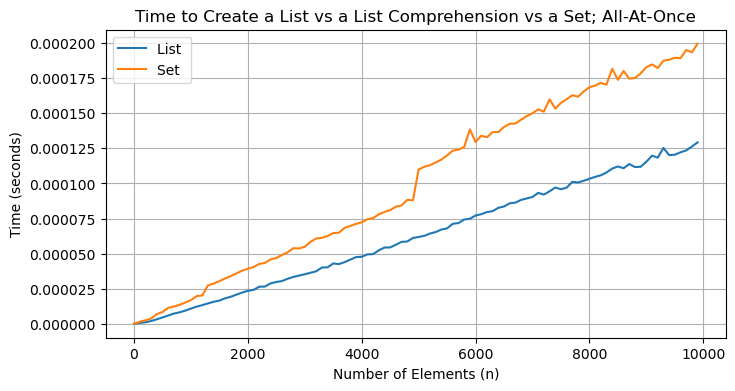

In [5]:
import timeit
import matplotlib.pyplot as plt

from tqdm import tqdm 

# Function to simply create a list of size n
def create_list_AAO(n):
    lst = list(range(n))

# Function to simply create a set of size n
def create_set_AAO(n):
    s = set(range(n))

# Lists to store results
list_times_AAO = []
set_times_AAO = []

sizes = list(range(0,10**4,100))        # 0, 100, 200, ..., 10**4-100

n_iterations = 1000                      # how many iterations to average over

# Measure the time for each input size

# for size in sizes:
for size in tqdm(sizes):

    list_time = timeit.timeit(lambda: create_list_AAO(size), number=n_iterations)
    set_time  = timeit.timeit(lambda: create_set_AAO(size),  number=n_iterations)
    
    # be sure to normalize by num_iterations
    list_times_AAO.append(list_time/n_iterations)   
    set_times_AAO.append(set_time  /n_iterations)

# Plotting the results
plt.figure(figsize=(8, 4))

plt.title('Time to Create a List vs a List Comprehension vs a Set; All-At-Once')
plt.plot(sizes, list_times_AAO, label="List ")
plt.plot(sizes, set_times_AAO,  label="Set ")

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


### Digression on Checkpoint Files

A very useful technique, which we will use when doing long computations in Modules 3 and 4, is to save
your results in a CSV file, and then when running the code again, we'll check if we saved it. If it isn't there, this is the first time running that code; if it is, we **don't run the code** but simply load the data from the file. 

If you are running on your own machine, you can save/read in the local directory the notebook lives in. If you are running in Codespaces, you should use the
directory `/workspaces/` in the current repo, which has the appropriate permissions to allow you to read and write from your notebook. 


This is a nice example of why CSV and TSV files are so useful. 

Loading checkpoint files!


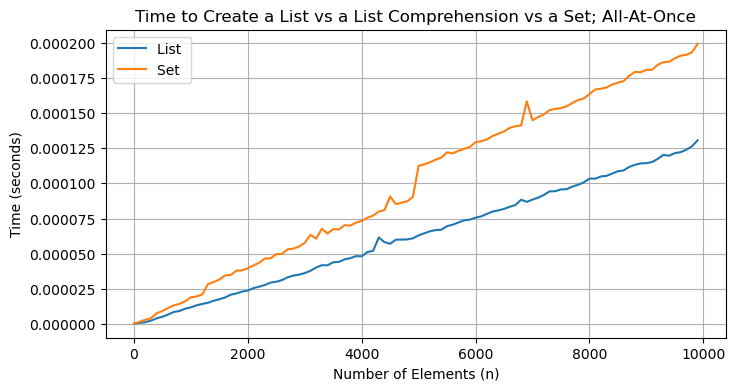

In [6]:
import os
import csv
import timeit
import matplotlib.pyplot as plt

# Specify the filename you want to check

# working_directory = '/workspaces/'      # for Codespaces
working_directory = './'                # for local machine

file_path_list = working_directory + 'list_times_AAO.csv'
file_path_set  = working_directory + 'set_times_AAO.csv'

# Check if the files exist in the current directory
if os.path.isfile(file_path_list) and os.path.isfile(file_path_set):
    
    print("Loading checkpoint files!")

    with open(file_path_list, 'r') as file:
        reader = csv.reader(file)
        # Reading the first row as strings and converting it to a list of integers
        list_times_AAO = list(map(float, next(reader)))
        
    with open(file_path_set, 'r') as file:
        reader = csv.reader(file)
        set_times_AAO = list(map(float, next(reader)))
        
else:
    # Function to simply create a list of size n
    def create_list_AAO(n):
        lst = list(range(n))

    # Function to simply create a list of size n using list comprehension
    def create_list_comprehension_AAO(n):
        lst = [k for k in range(n)]

    # Function to simply create a set of size n
    def create_set_AAO(n):
        s = set(range(n))

    # Lists to store results
    list_times_AAO = []
    set_times_AAO = []

    sizes = list(range(0,10**4,100))        # 0, 100, 200, ..., 10**4

    n_iterations = 1000                      # how many iterations to average over

    # Measure the time for each input size

#     for size in sizes:
    for size in tqdm(sizes):

        list_time = timeit.timeit(lambda: create_list_AAO(size), number=n_iterations)
        set_time  = timeit.timeit(lambda: create_set_AAO(size),  number=n_iterations)

        # be sure to normalize by num_iterations
        list_times_AAO.append(list_time/n_iterations)   
        set_times_AAO.append(set_time  /n_iterations)

    # Saving the checkpoint files

    # Save as a CSV file
    with open(file_path_list, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(list_times_AAO)  # Write all values in a single row

    with open(file_path_set, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(set_times_AAO)  # Write all values in a single row

    print(f"File saved at: {file_path_list}")
    print(f"File saved at: {file_path_set}")


# Plotting the results
plt.figure(figsize=(8, 4))

plt.title('Time to Create a List vs a List Comprehension vs a Set; All-At-Once')
plt.plot(sizes, list_times_AAO, label="List ")
plt.plot(sizes, set_times_AAO,  label="Set ")

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


This next cell times the creation of lists and sets by appending or adding one element at a time.
In each case, Python will first create an empty data structure, then extend it as you add elements.
However, we will see that this is not much more expensive than the previous, but Python is smart about the way it resizes the data structures and allocates memory. 

100%|███████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.81it/s]


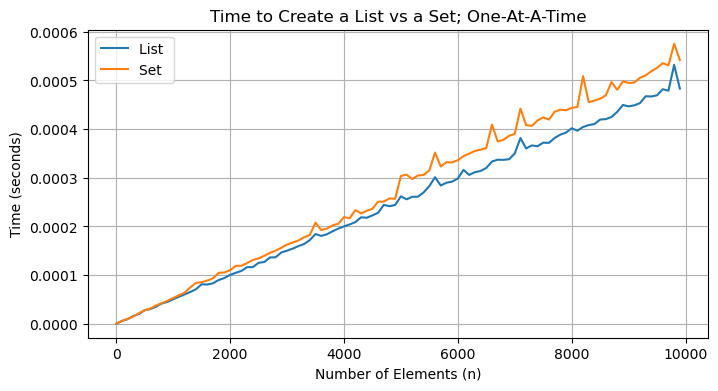

In [7]:
# Function to create a list One element At A Time
def create_list_OAAT(n):
    lst = []
    for k in range(n):
        lst.append(k)

# Similar for sets
def create_set_OAAT(n):
    s = set()
    for k in range(n):
        s.add(k)

# Lists to store results
list_times_OAAT = []
set_times_OAAT = []

sizes = list(range(0,10**4,100))

num_iterations = 500

# Measure the time for each input size
for size in tqdm(sizes):
# for size in tqdm(sizes):

    # Note: if you want to do multiple iterations, you must use anonymous function lambda: f(..)
    list_time = timeit.timeit(lambda: create_list_OAAT(size), number=num_iterations)
    set_time = timeit.timeit(lambda:  create_set_OAAT(size),  number=num_iterations)
    
    list_times_OAAT.append(list_time/num_iterations)   # be sure to normalize by num_iterations
    set_times_OAAT.append(set_time/num_iterations)

# Plotting the results
plt.figure(figsize=(8, 4))

plt.title('Time to Create a List vs a Set; One-At-A-Time')
plt.plot(sizes, list_times_OAAT, label="List ")
plt.plot(sizes, set_times_OAAT, label="Set ")

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


Since we've already create the timing data, let's compare them on the same graph!

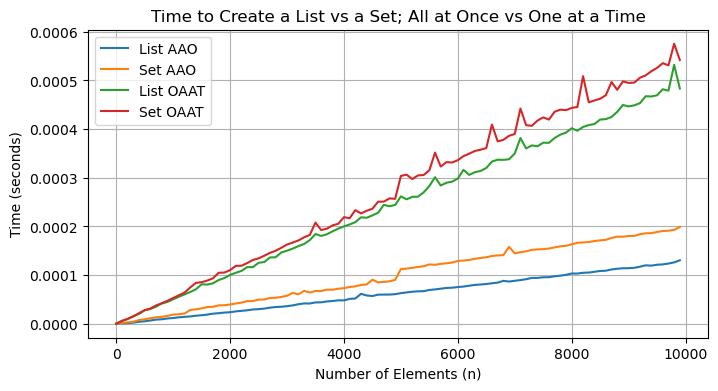

In [8]:
# Plotting the results
plt.figure(figsize=(8, 4))

plt.title('Time to Create a List vs a Set; All at Once vs One at a Time')
plt.plot(sizes, list_times_AAO, label="List AAO")
plt.plot(sizes, set_times_AAO, label="Set AAO")
plt.plot(sizes, list_times_OAAT, label="List OAAT")
plt.plot(sizes, set_times_OAAT, label="Set OAAT")

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

Finally, let's see what happens when we search for an element in the data structure. **Here is where we see the enormous benefit of using sets (or dictionaries) instead of lists**.

Note: Be sure to understand that this is not just an **access** of an element when we know exactly where it is (say, referring to lst[index]), but rather finding an element in an unordered list, when we don't know where it is. 

100%|███████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 37.28it/s]


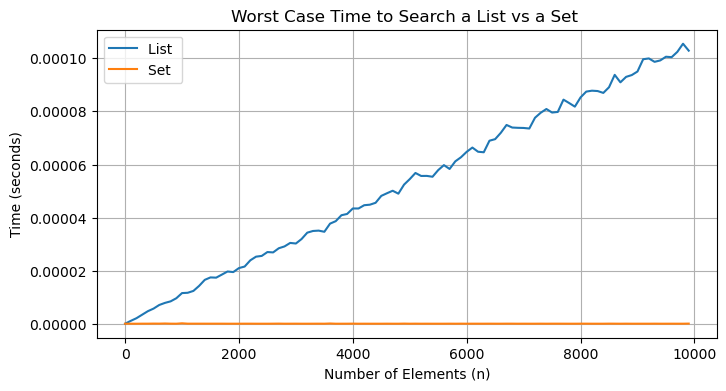

In [9]:
# Function to simply create a list of size n
def search_list(lst,n):
    return n in lst

# Function to simply create a set of size n
def search_set(s,n):
    return n in s

# Lists to store results
list_times_search = []
set_times_search = []

sizes = list(range(0,10**4,100))        # 0, 100, 200, ..., 10**4

n_iterations = 500                      # how many iterations to average over

# Measure the time for each input size

# for size in sizes:
for size in tqdm(sizes):
    
    lst = list(range(size))
    s   = set (range(size))

    # Note: if you want to do multiple iterations, you must use anonymous function lambda: f(..)
    list_time = timeit.timeit(lambda: search_list(lst,size-1), number=n_iterations)
    set_time  = timeit.timeit(lambda: search_set (s,  size-1), number=n_iterations)
    
    list_times_search.append(list_time/n_iterations)   # be sure to normalize by num_iterations
    set_times_search.append(set_time  /n_iterations)

# Plotting the results
plt.figure(figsize=(8, 4))

plt.title('Worst Case Time to Search a List vs a Set ')
plt.plot(sizes, list_times_search, label="List ")
plt.plot(sizes, set_times_search,  label="Set ")

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


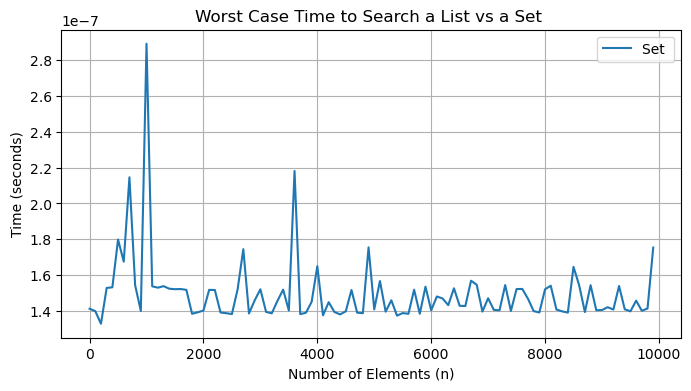

Mean time to search a list: 0.0000526724
Mean time to search a set:  0.000000149546840


In [10]:
# importing mean() 
from statistics import mean 

# Plotting the results
plt.figure(figsize=(8, 4))

plt.title('Worst Case Time to Search a List vs a Set ')
# plt.plot(sizes, list_times_search, label="List ")
plt.plot(sizes, set_times_search,  label="Set ")

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean time to search a list: {mean(list_times_search):.10f}")
print(f"Mean time to search a set:  {mean(set_times_search):.15f}")


In [2]:
!pip install tqdm

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# matrices using lists, dictionaries, and numpy arrays
'''
for n = 4a
0 1 2 3
4 5 6 7
8 9 10 11
12 13 14 15 
'''



# Function to create a list 
def create_list(n):
    lst = [0]*n

# Similar for sets
def create_set(n):
    s = set(range(n))
        
# Similar for arrays
def create_np(n):
    a = np.zeros(n)
#     for k in range(n):
#         a[k] = k

  0%|          | 0/100 [00:00<?, ?it/s]

List:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Array: [0 1 2 3 4 5 6 7 8 9]


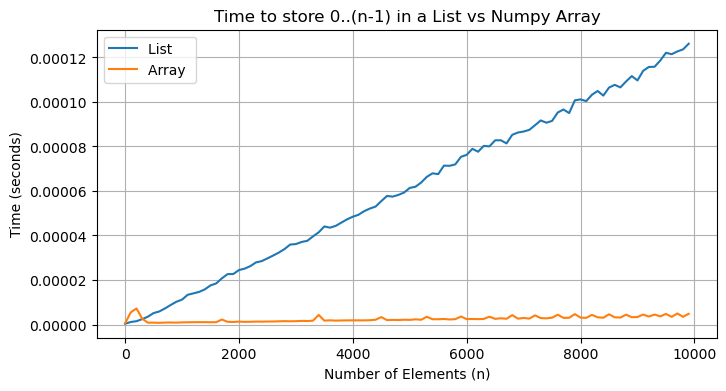

In [18]:
from tqdm.notebook import tqdm
import numpy as np
import timeit
import matplotlib.pyplot as plt

# Function to create a list 
def create_list(n):
    lst = list(range(n))

        
# Similar for arrays
def create_np(n):
    a = np.arange(n)

# Lists to store results
list_times = []
array_times = []

sizes = list(range(0,10**4,100))

num_iterations = 500

# Measure the time for each input size
for size in tqdm(sizes):
# for size in tqdm(sizes):

    # Note: if you want to do multiple iterations, you must use anonymous function lambda: f(..)
    list_time  = timeit.timeit(lambda: create_list(size),   number=num_iterations)
    array_time = timeit.timeit(lambda: create_np(size),  number=num_iterations)
    
    list_times.append( list_time /num_iterations )   # be sure to normalize by num_iterations
    array_times.append(array_time/num_iterations)
    
    # examples for n = 10
    
print(f'List:  {list(range(10))}')
print(f'Array: {np.arange(10)}')

# Plotting the results
plt.figure(figsize=(8, 4))

plt.title('Time to store 0..(n-1) in a List vs Numpy Array')
plt.plot(sizes, list_times, label="List ")
plt.plot(sizes, array_times, label="Array ")

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Function to create a list 
def create_list_(n):
    lst = [[n * i + j for j in range(n)] for i in range(n)]
    return lst
        
# Similar for arrays
def create_np_(n):
    a = np.arange(n*n).reshape(n,n)
    return a

create_list(4)

  0%|          | 0/20 [00:00<?, ?it/s]

List:
[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]

Array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


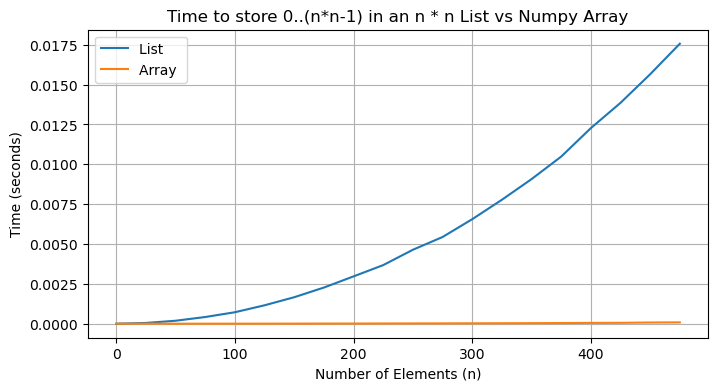

In [35]:
from tqdm.notebook import tqdm
import numpy as np
import timeit
import matplotlib.pyplot as plt

# Function to create a list 
def create_list(n):
    lst = [[n * i + j for j in range(n)] for i in range(n)]

        
# Similar for arrays
def create_np(n):
    a = np.arange(n*n).reshape(n,n)

# Lists to store results
list_times = []
array_times = []

sizes = list(range(0,500,25))

num_iterations = 500

# Measure the time for each input size
for size in tqdm(sizes):
# for size in tqdm(sizes):

    # Note: if you want to do multiple iterations, you must use anonymous function lambda: f(..)
    list_time  = timeit.timeit(lambda: create_list(size),   number=num_iterations)
    array_time = timeit.timeit(lambda: create_np(size),  number=num_iterations)
    
    list_times.append( list_time /num_iterations )   # be sure to normalize by num_iterations
    array_times.append(array_time/num_iterations)
    
    # examples for n = 10
    
print(f'List:\n{create_list_(4)}')
print()
print(f'Array:\n{create_np_(4)}')

# Plotting the results
plt.figure(figsize=(8, 4))

plt.title('Time to store 0..(n*n-1) in an n * n List vs Numpy Array')
plt.plot(sizes, list_times, label="List ")
plt.plot(sizes, array_times, label="Array ")

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

Examples for Live Session on Monday, Oct 7

In [54]:
# Quicksort

def partition(lst, low, high):

    pivot = lst[high]
    i = low - 1

    for j in range(low, high):
        if lst[j] <= pivot:     # if lst[j] <= pivot:
            i = i + 1
            (lst[i], lst[j]) = (lst[j], lst[i])
    (lst[i + 1], lst[high]) = (lst[high], lst[i + 1])


    return i + 1

def quickSort_recursive(lst, low, high):
    if low <= high:

        pi = partition(lst, low, high)
        quickSort_recursive(lst, low, pi)     
        quickSort_recursive(lst, pi + 1, high)
        
def quickSort(lst):
    quickSort_recursive(lst,0,len(lst)-1)


data = [1, 4, 7, 4, 1, 7,10, 9, -2]
print("Unsorted lst")
print(data)

quickSort(data)
print("Sorted lst")
print(data)

Unsorted lst
[1, 4, 7, 4, 1, 7, 10, 9, -2]


RecursionError: maximum recursion depth exceeded in comparison

In [43]:
quickSort(data)
print(data)

[-2, 1, 1, 4, 7, 9, 10]


In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
 
# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
 
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
 
# define the model
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x
 
model = PimaClassifier()
print(model)
 
# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
n_epochs = 100
batch_size = 10
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
# compute accuracy
y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")
 
# make class predictions with the model
predictions = (model(X) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)
Accuracy 0.6510416865348816
[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 0 (expected 1)


$$O(n^2)$$